In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings(action='ignore')
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.formula.api as formula
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
#from sklearn.externals import joblib
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from IPython.display import display

In [2]:
data = pd.read_csv('aurangabad_19_23.csv',parse_dates =["date"])
data.head()

,City,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,...,RH,WS,WD,SR,RF,TOT-RF,date,day,month,year
0,Aurangabad,37.10,123.47,18.77,17.25,7.04,20.81,5.38,1.19,65.32,...,23.80,1.14,200.78,712.83,0.0,0.0,2019-01-01,1,1,2019
1,Aurangabad,67.45,160.01,79.74,16.15,47.45,31.91,4.64,1.40,67.58,...,26.41,1.40,186.57,652.32,0.0,0.0,2019-02-01,2,1,2019
2,Aurangabad,30.56,133.68,15.85,17.76,4.93,20.13,8.40,0.78,84.89,...,27.75,1.35,187.25,662.91,0.0,0.0,2019-03-01,3,1,2019
3,Aurangabad,45.86,126.96,16.02,17.41,7.22,20.28,7.63,1.25,73.10,...,30.61,1.48,178.47,673.39,0.0,0.0,2019-04-01,4,1,2019
4,Aurangabad,36.93,142.26,16.11,17.57,5.22,20.30,6.89,0.91,81.48,...,35.48,1.74,149.55,659.10,0.0,0.0,2019-05-01,5,1,2019


# Data Preprocessing

In [3]:
# drop the unwanted columns/features
cols_to_drop = ['City']
dt = data.drop(cols_to_drop,axis=1)
# print out the info of the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   PM2_5        1551 non-null   float64       
 1   PM10         1551 non-null   float64       
 2   NO           1551 non-null   float64       
 3   NO2          1551 non-null   float64       
 4   NOx          1551 non-null   float64       
 5   NH3          1551 non-null   float64       
 6   SO2          1551 non-null   float64       
 7   CO           1551 non-null   float64       
 8   Ozone        1551 non-null   float64       
 9   Benzene      1551 non-null   float64       
 10  Toluene      1551 non-null   float64       
 11  Eth-Benzene  1551 non-null   float64       
 12  MP-Xylene    1551 non-null   float64       
 13  O            1551 non-null   float64       
 14  RH           1551 non-null   float64       
 15  WS           1551 non-null   float64       
 16  WD    

In [4]:
# check for duplicated values and null values
print('Are there any duplicated values in our data ? : {}\n'.format(dt.duplicated().any()))
print('The total number of null values in each colum:')
display(dt.isnull().sum())

Are there any duplicated values in our data ? : False

The total number of null values in each colum:


PM2_5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
SO2            0
CO             0
Ozone          0
Benzene        0
Toluene        0
Eth-Benzene    0
MP-Xylene      0
O              0
RH             0
WS             0
WD             0
SR             0
RF             0
TOT-RF         0
date           0
day            0
month          0
year           0
dtype: int64

In [5]:
# fill in the missing values with the mean of the particular column
dt.fillna(value=dt.mean(),inplace=True)
# let's check the data again if there are any missing values
dt.isnull().any()

PM2_5          False
PM10           False
NO             False
NO2            False
NOx            False
NH3            False
SO2            False
CO             False
Ozone          False
Benzene        False
Toluene        False
Eth-Benzene    False
MP-Xylene      False
O              False
RH             False
WS             False
WD             False
SR             False
RF             False
TOT-RF         False
date           False
day            False
month          False
year           False
dtype: bool

In [6]:
dt.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,...,RH,WS,WD,SR,RF,TOT-RF,date,day,month,year
0,37.10,123.47,18.77,17.25,7.04,20.81,5.38,1.19,65.32,0.21,...,23.80,1.14,200.78,712.83,0.0,0.0,2019-01-01,1,1,2019
1,67.45,160.01,79.74,16.15,47.45,31.91,4.64,1.40,67.58,0.26,...,26.41,1.40,186.57,652.32,0.0,0.0,2019-02-01,2,1,2019
2,30.56,133.68,15.85,17.76,4.93,20.13,8.40,0.78,84.89,0.21,...,27.75,1.35,187.25,662.91,0.0,0.0,2019-03-01,3,1,2019
3,45.86,126.96,16.02,17.41,7.22,20.28,7.63,1.25,73.10,0.20,...,30.61,1.48,178.47,673.39,0.0,0.0,2019-04-01,4,1,2019
4,36.93,142.26,16.11,17.57,5.22,20.30,6.89,0.91,81.48,0.26,...,35.48,1.74,149.55,659.10,0.0,0.0,2019-05-01,5,1,2019


In [7]:
def remove_outliers(df, n_std, dataset):
    """
    Removes outliers from a dataset using the z-score method.
    
    Parameters:
        data (array-like): The input dataset.
        n_std (float): The number of standard deviations from the mean to use as the threshold for identifying outliers.
    
    Returns:
        The input dataset with outliers removed.
    """
    z_scores = np.abs((df - np.mean(df)) / np.std(df))
    filtered_data = dataset[z_scores < n_std]
    return filtered_data

In [8]:
df = dt['PM2_5']
dataset = dt
data = remove_outliers(df, 3, dt)
print(data)

      PM2_5    PM10     NO    NO2    NOx    NH3    SO2    CO  Ozone  Benzene  \
0     37.10  123.47  18.77  17.25   7.04  20.81   5.38  1.19  65.32     0.21   
1     67.45  160.01  79.74  16.15  47.45  31.91   4.64  1.40  67.58     0.26   
2     30.56  133.68  15.85  17.76   4.93  20.13   8.40  0.78  84.89     0.21   
3     45.86  126.96  16.02  17.41   7.22  20.28   7.63  1.25  73.10     0.20   
4     36.93  142.26  16.11  17.57   5.22  20.30   6.89  0.91  81.48     0.26   
...     ...     ...    ...    ...    ...    ...    ...   ...    ...      ...   
1546  38.36  111.66   8.23  29.48  10.53  26.47   8.09  1.05  32.76    11.95   
1547  46.48  136.57   9.28  29.19  11.22  26.40  10.02  1.15  31.79    15.13   
1548  62.20  244.66   9.59  29.71  11.74  26.43  13.54  1.15  31.50    21.61   
1549  38.99  109.57   8.24  28.58  10.06  26.92   7.74  0.92  31.06     7.62   
1550  47.72  110.69   9.04  29.88  11.38  26.46   7.33  1.28  36.08     7.10   

      ...     RH    WS      WD         

# Exploratory Data Analysis

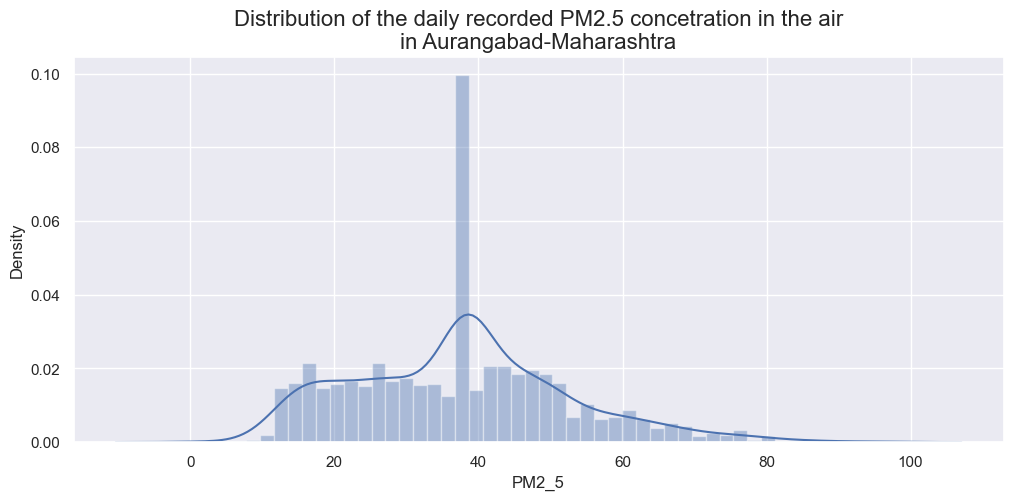

In [9]:
plt.figure(figsize=(12,5))
sns.distplot(data['PM2_5'],bins=50)
plt.title('Distribution of the daily recorded PM2.5 concetration in the air\nin Aurangabad-Maharashtra',
          fontsize=16)
plt.show()

In [10]:
import pandas as pd
import numpy as np

months = ['January','February','March','April','May','June','July',
         'August','September','October','November','December']

# convert 'month' column to categorical variable with specified category order
monthly_data = data[['month','PM2_5']]
#monthly_data['month'] = pd.Categorical(monthly_data['month'], categories=months, ordered=True)

# calculate monthly median of 'PM2_5'
monthly_average = monthly_data.groupby('month')['PM2_5'].median()

# round the values to one decimal place
monthly_average = np.round(monthly_average, 1)

# convert the resulting Series to a DataFrame
monthly_average = pd.DataFrame(monthly_average)

# set the index to the categorical variable and rename the column
monthly_average.index.name = 'month'
monthly_average.columns = ['median_PM2_5']

# display the resulting DataFrame
print(monthly_average)

       median_PM2_5
month              
1              46.3
2              42.9
3              41.0
4              41.1
5              34.4
6              28.1
7              29.0
8              20.1
9              28.4
10             31.0
11             43.2
12             45.0


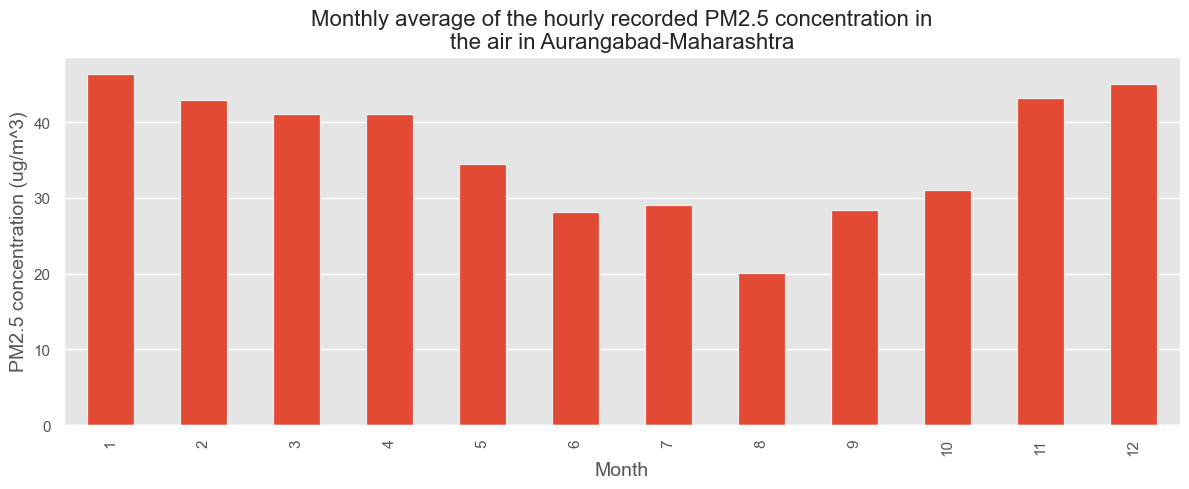

In [11]:
# plot the data
with plt.style.context('ggplot'):
    monthly_average.plot(figsize=(12,5),legend=False,kind='bar',linewidth=.9)
    plt.xlabel('Month',fontsize=14)
    plt.ylabel('PM2.5 concentration (ug/m^3)',fontsize=14)
    plt.title('Monthly average of the hourly recorded PM2.5 concentration in\nthe air in Aurangabad-Maharashtra',fontsize=16)
    plt.grid(axis='x')
    plt.tight_layout()
    plt.show()

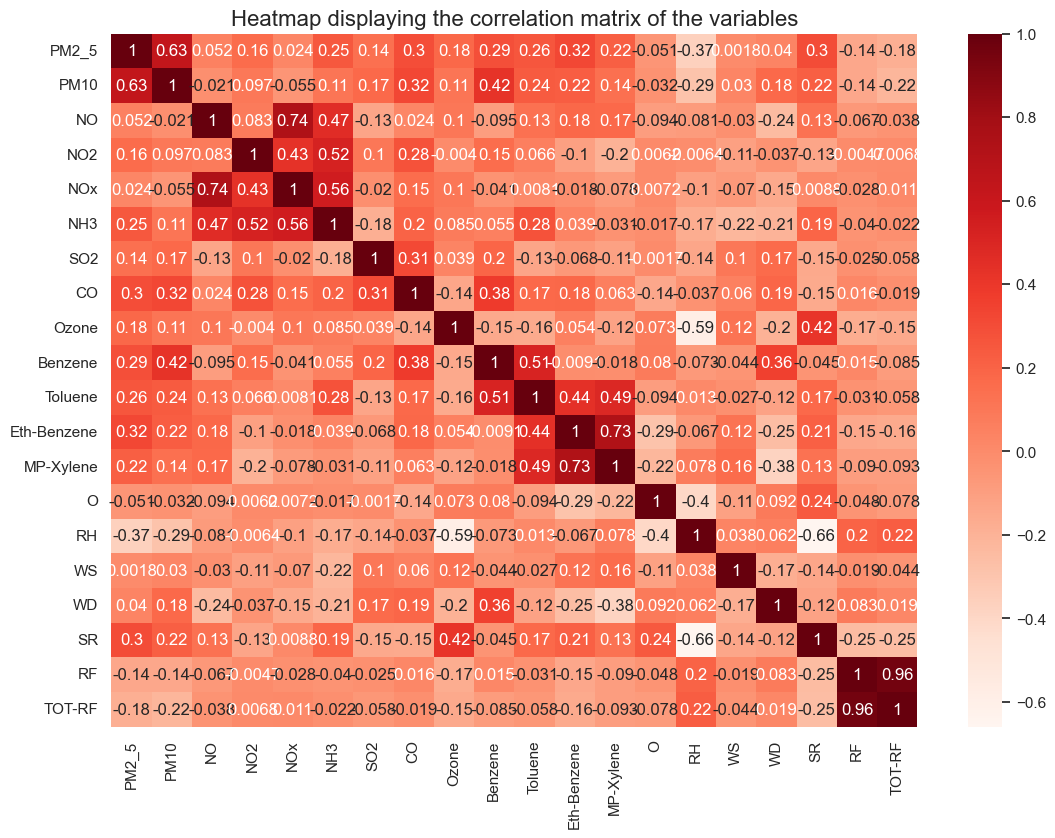

In [12]:
# let's try and visualize the relationships between the features of the data
plt.figure(figsize=(13,9))
correlation_data = data[['PM2_5', 'PM10', 'NO', 'NO2',
                         'NOx', 'NH3', 'SO2', 'CO',
                         'Ozone', 'Benzene', 'Toluene','Eth-Benzene','MP-Xylene','O','RH','WS','WD','SR','RF','TOT-RF']]
sns.heatmap(correlation_data.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the correlation matrix of the variables',fontsize=16)
plt.show()

# Model Training and Evalution

In [13]:
cols_to_drop = ['date','year','month','day']
newdata = data.drop(cols_to_drop,axis=1)

# calculate the variance inflation factor of each feature and detect multicollinearity
cons_data = sm.tools.add_constant(newdata)
series_before = pd.Series([variance_inflation_factor(cons_data.values,i) for i in range(cons_data.shape[1])],
                         index=cons_data.columns)
series_before

const          312.140245
PM2_5            2.088561
PM10             2.012589
NO               3.154161
NO2              2.022550
NOx              3.627411
NH3              2.757712
SO2              1.384406
CO               1.704498
Ozone            1.943516
Benzene          2.845759
Toluene          2.959203
Eth-Benzene      2.739113
MP-Xylene        3.180328
O                1.548269
RH               3.355439
WS               1.240863
WD               1.769311
SR               2.513164
RF              15.056283
TOT-RF          15.510059
dtype: float64

In [14]:
newdata.head()

,PM2_5,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,Eth-Benzene,MP-Xylene,O,RH,WS,WD,SR,RF,TOT-RF
0,37.10,123.47,18.77,17.25,7.04,20.81,5.38,1.19,65.32,0.21,0.00,10.45,0.62,22.11,23.80,1.14,200.78,712.83,0.0,0.0
1,67.45,160.01,79.74,16.15,47.45,31.91,4.64,1.40,67.58,0.26,0.00,13.15,0.90,22.72,26.41,1.40,186.57,652.32,0.0,0.0
2,30.56,133.68,15.85,17.76,4.93,20.13,8.40,0.78,84.89,0.21,0.00,7.83,0.44,23.36,27.75,1.35,187.25,662.91,0.0,0.0
3,45.86,126.96,16.02,17.41,7.22,20.28,7.63,1.25,73.10,0.20,0.00,13.26,0.65,23.42,30.61,1.48,178.47,673.39,0.0,0.0
4,36.93,142.26,16.11,17.57,5.22,20.30,6.89,0.91,81.48,0.26,11.67,8.76,0.40,23.27,35.48,1.74,149.55,659.10,0.0,0.0


In [15]:
#from feature_engine import DuplicateFeature

In [16]:
columns_to_drop = ['RH','WS','WD','SR','RF','TOT-RF']

newdata = newdata.drop(columns_to_drop,axis=1)
cons_data2 = sm.tools.add_constant(newdata)
series_after = pd.Series([variance_inflation_factor(cons_data2.values,i) for i in range(cons_data2.shape[1])],
                         index=cons_data2.columns)
series_after


const          100.442002
PM2_5            1.989644
PM10             1.936158
NO               3.141209
NO2              1.906847
NOx              3.577956
NH3              2.498671
SO2              1.320831
CO               1.607543
Ozone            1.242551
Benzene          2.434390
Toluene          2.778353
Eth-Benzene      2.647721
MP-Xylene        2.790181
O                1.141179
dtype: float64

In [17]:
newdata.columns = ['PM2_5','PM10','NO','NO2','NOx','NH3','SO2','CO','Ozone','O','Benzene','Toluene','Eth_Benzene','MP_Xylene']

# PM2.5 is skewed to the right so we log transform the values to normalize the distribution
newdata['PM2_5'] = np.log(newdata['PM2_5'])

In [18]:
mul_reg = formula.ols(formula="PM2_5 ~ PM10  + NO + NO2 + NOx + NH3 + SO2 + CO + Ozone + O + Benzene + Toluene + Eth_Benzene + MP_Xylene",
                      data=newdata).fit()
mul_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PM2_5   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     81.13
Date:                Wed, 19 Apr 2023   Prob (F-statistic):          1.59e-163
Time:                        10:16:02   Log-Likelihood:                -657.88
No. Observations:                1539   AIC:                             1344.
Df Residuals:                    1525   BIC:                             1419.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.5517      0.095     26.798      0.000       2.365       2.739
PM10            0.0061      0.000     17.988      0.000       0.005       0.007
NO             -0.0007      0.001     -0.600      0.549      -0.003       0.002
NO2             0.0033      0.001      2.587      0.010       0.001       0.006
NOx            -0.0023      0.002     -1.424      0.155      -0.005       0.001
NH3             0.0103      0.002      5.014      0.000       0.006       0.014
SO2             0.0070      0.001      4.908      0.000       0.004       0.010
CO              0.0337      0.040      0.851      0.395      -0.044       0.111
Ozone           0.0025      0.001      4.859      0.000       0.002       0.004
O               0.0084      0.004      2.004      0.045       0.000       0.017
Benzene        -0.0012      0.001     -1.354      0.176      -0.003       0.001
Toluene         0.0269      0.005      5.411      0.000       0.017       0.037
Eth_Benzene     0.0085      0.003      3.336      0.001       0.004       0.014
MP_Xylene      -0.0024      0.003     -0.853      0.394      -0.008       0.003
==============================================================================
Omnibus:                     1907.407   Durbin-Watson:                   0.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           780200.829
Skew:                          -6.025   Prob(JB):                         0.00
Kurtosis:                     112.643   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
# we split the data into predictor variables and Outcome variable
X = newdata.drop('PM2_5',axis=1)
y = newdata['PM2_5']

# we need to scale or normalize the predictor variables since they are not on the same
# scale and some of their distributions are skewed.
X_scaled =  preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled.dropna(inplace=True)
# print the scaled predictor variables.
X_scaled.head()

,PM10,NO,NO2,NOx,NH3,SO2,CO,Ozone,O,Benzene,Toluene,Eth_Benzene,MP_Xylene
0,1.211702,0.727281,-0.190587,-0.211658,1.270558,-0.895172,1.304926,1.413059,-0.895613,-0.835226,2.034038,-0.922412,-2.026366
1,2.292298,4.825358,-0.296186,3.350583,2.832186,-0.991886,1.994867,1.525559,-0.881383,-0.835226,2.912235,-0.877265,-1.860421
2,1.513642,0.531015,-0.141628,-0.397659,1.174890,-0.500474,-0.042102,2.387228,-0.895613,-0.835226,1.181861,-0.951435,-1.686315
3,1.314911,0.542441,-0.175228,-0.195790,1.195994,-0.601109,1.502052,1.800337,-0.898459,-0.835226,2.948013,-0.917575,-1.669993
4,1.767378,0.548490,-0.159868,-0.372095,1.198807,-0.697823,0.385004,2.217483,-0.881383,-0.187768,1.484351,-0.957885,-1.710799


In [20]:
y.head()

0    3.613617
1    4.211387
2    3.419692
3    3.825593
4    3.609024
Name: PM2_5, dtype: float64

In [21]:
# we now split out data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=.3,random_state=0)

# instantiate the linear regression model
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)   # fit the model

LinearRegression()

In [22]:
# we now score the model
print('Score on train data: {}\n'.format(lin_model.score(X_train,y_train)))
print('Score on test data: {}'.format(lin_model.score(X_test,y_test)))

Score on train data: 0.43549438539183827

Score on test data: 0.22662311753237763


In [23]:
prediction = lin_model.predict(X_test)
mse = mean_squared_error(y_test,prediction)
accuracy = r2_score(y_test,prediction)

print('Mean Squared Error: {}\n'.format(mse))
print('Overall model accuracy: {}'.format(accuracy))

Mean Squared Error: 0.16372851909933048

Overall model accuracy: 0.22662311753237763


# Ensemble Methods

In [24]:
ensemble_data = data.drop(cols_to_drop,axis=1)

# we split the data into predictor variables and Outcome variable
X = ensemble_data.drop('PM2_5',axis=1)
y = ensemble_data['PM2_5']

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)

# DecisionTreeRegressor

In [26]:
# we go ahead to use the ensemble methods as the LinearRegression model has a low accuracy
# on both the test and train data.
decision_tree = DecisionTreeRegressor(max_depth=5,
                                     max_features='auto',
                                     min_samples_split=3,
                                     min_samples_leaf=2)
decision_tree.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=5, max_features='auto', min_samples_leaf=2,
                      min_samples_split=3)

In [27]:
# we now score the model
print('Score on train data: {}\n'.format(decision_tree.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(decision_tree.score(xtest,ytest)))

tree_pred = decision_tree.predict(xtest)
tree_mse = mean_squared_error(ytest,tree_pred)
tree_accuracy = r2_score(ytest,tree_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_mse)))
print('Overall model accuracy: {}'.format(tree_accuracy))

Score on train data: 0.7394022244426164

Score on test data: 0.5900586662786614

Root Mean Squared Error: 9.685579095254269

Overall model accuracy: 0.5900586662786614


In [28]:
# We now tune the parameters of the model to see if we can increase the accuracy
params = {'max_depth':[3,4,5,6,7],
         'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9,10],
         'min_samples_leaf':[2,3,4,5,6,7,8,9,10]}

tree = DecisionTreeRegressor()

# initialize the grid search for the best parameters
tree_search = GridSearchCV(tree,param_grid=params,
                          n_jobs=-1,cv=5)

tree_search.fit(xtrain,ytrain)   # fit the model

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [29]:
# we now score the model
print('Score on train data: {}\n'.format(tree_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(tree_search.score(xtest,ytest)))
print('Best parameters found:')
display(tree_search.best_params_)

tree_search_pred = tree_search.predict(xtest)
tree_search_mse = mean_squared_error(ytest,tree_search_pred)
tree_search_accuracy = r2_score(ytest,tree_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(tree_search_mse)))
print('Overall model accuracy: {}'.format(tree_search_accuracy))

Score on train data: 0.7234712728074655

Score on test data: 0.6339589406716268

Best parameters found:


{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 10,
 'min_samples_split': 10}

Root Mean Squared Error: 9.15228718039571

Overall model accuracy: 0.6339589406716268


In [30]:
dtpredicted=tree_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Decision_tree':dtpredicted.tolist()})
df.to_excel('decision_tree.xlsx')

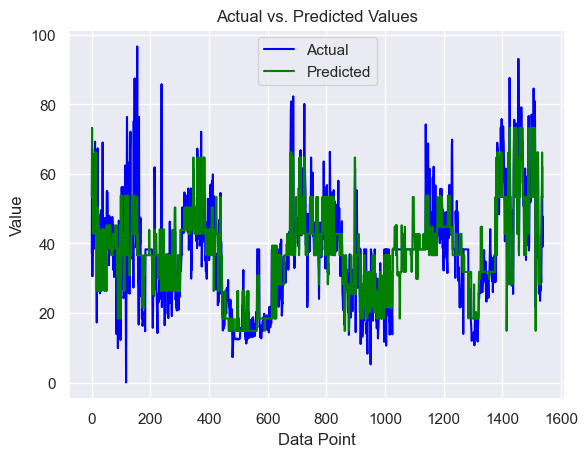

In [31]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, dtpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

# RandomForestRegressor

In [32]:
# instantiate the RandomForestRegressor model and fit the model on the training data
forest = RandomForestRegressor(n_estimators=100,
                              max_depth=7,
                              max_features='auto',
                              min_samples_split=7,
                              min_samples_leaf=3)

forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=7, min_samples_leaf=3, min_samples_split=7)

In [33]:
# we now score the model
print('Score on train data: {}\n'.format(forest.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest.score(xtest,ytest)))

forest_pred = forest.predict(xtest)
forest_mse = mean_squared_error(ytest,forest_pred)
forest_accuracy = r2_score(ytest,forest_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_mse)))
print('Overall model accuracy: {}'.format(forest_accuracy))

Score on train data: 0.8565127435671649

Score on test data: 0.7329908884339518

Root Mean Squared Error: 7.816778001268859

Overall model accuracy: 0.7329908884339518


In [34]:
# we now tune the parameters of the RandomForestRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['n_estimators'] = [100,200,300,400,500]

# instantiate the model
random_forest = RandomForestRegressor()

# perform the grid search for the best parameters
forest_search = RandomizedSearchCV(random_forest,params,n_jobs=-1,
                                   cv=5,verbose=2)
forest_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [35]:
# we now score the model
print('Score on train data: {}\n'.format(forest_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(forest_search.score(xtest,ytest)))
print('Best parameters found:')
display(forest_search.best_params_)

forest_search_pred = forest_search.predict(xtest)
forest_search_mse = mean_squared_error(ytest,forest_search_pred)
forest_search_accuracy = r2_score(ytest,forest_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(forest_search_mse)))
print('Overall model accuracy: {}'.format(forest_search_accuracy))

Score on train data: 0.7999691882529825

Score on test data: 0.7163063114840456

Best parameters found:


{'n_estimators': 300,
 'min_samples_split': 4,
 'min_samples_leaf': 7,
 'max_features': 'auto',
 'max_depth': 6}

Root Mean Squared Error: 8.057300741673341

Overall model accuracy: 0.7163063114840456


In [36]:
rfpredicted=forest_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from random_forest':rfpredicted.tolist()})
df.to_excel('randomforest.xlsx')

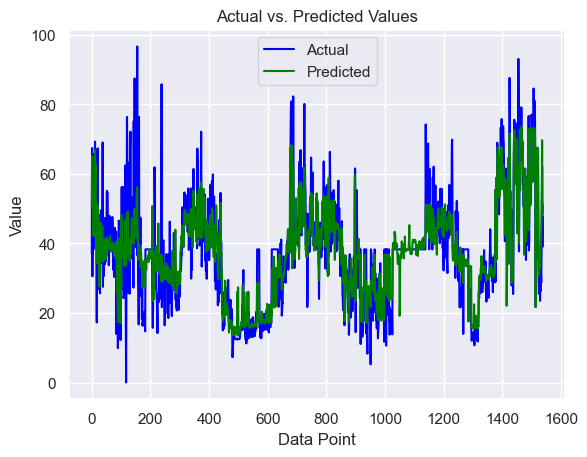

In [37]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, rfpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

# GradientBoostingRegressor

In [38]:
# instantiate the GradientBoostingRegressor model and fit the model on the training data
grad_boost = GradientBoostingRegressor(n_estimators=100,
                                      max_depth=7,
                                      max_features='auto',
                                      min_samples_split=7,
                                      min_samples_leaf=3,
                                      learning_rate=0.1)

grad_boost.fit(xtrain,ytrain)

GradientBoostingRegressor(max_depth=7, max_features='auto', min_samples_leaf=3,
                          min_samples_split=7)

In [39]:
# we now score the model
print('Score on train data: {}\n'.format(grad_boost.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(grad_boost.score(xtest,ytest)))

gboost_pred = grad_boost.predict(xtest)
gboost_mse = mean_squared_error(ytest,gboost_pred)
gboost_accuracy = r2_score(ytest,gboost_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_mse)))
print('Overall model accuracy: {}'.format(gboost_accuracy))

Score on train data: 0.9922712398254417

Score on test data: 0.7488538978079058

Root Mean Squared Error: 7.581025514900193

Overall model accuracy: 0.7488538978079058


In [40]:
# we now tune the parameters of the GradientBoostingRegressor model using RandomizedSearchCV to 
# find the best parameters and increase the accuracy of the model

params['learning_rate'] = np.linspace(0.1,1,10)

# instantiate the model
gradient_boosting = GradientBoostingRegressor()

# perform the grid search for the best parameters
gboost_search = RandomizedSearchCV(gradient_boosting,params,n_jobs=-1,
                                   cv=5,verbose=2)
gboost_search.fit(xtrain,ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [41]:
# we now score the model
print('Score on train data: {}\n'.format(gboost_search.score(xtrain,ytrain)))
print('Score on test data: {}\n'.format(gboost_search.score(xtest,ytest)))
print('Best parameters found:')
display(gboost_search.best_params_)

gboost_search_pred = gboost_search.predict(xtest)
gboost_search_mse = mean_squared_error(ytest,gboost_search_pred)
gboost_search_accuracy = r2_score(ytest,gboost_search_pred)

print('Root Mean Squared Error: {}\n'.format(np.sqrt(gboost_search_mse)))
print('Overall model accuracy: {}'.format(gboost_search_accuracy))

Score on train data: 0.9980673066272944

Score on test data: 0.7589978003225472

Best parameters found:


{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 5,
 'learning_rate': 0.2}

Root Mean Squared Error: 7.426347041459235

Overall model accuracy: 0.7589978003225472


In [42]:
xgpredicted=gboost_search.predict(X)
df=pd.DataFrame({'Actual':y.tolist(),'Predicted from Xgboost':xgpredicted.tolist()})
df.to_excel('Xgboost.xlsx')

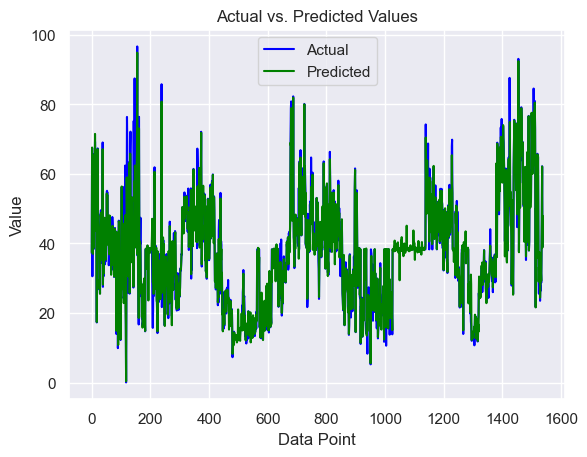

In [43]:
import matplotlib.pyplot as plt


# x-axis values (assuming 0-based indexing)
x_values = range(len(y))

# plot actual values as a blue line
plt.plot(x_values, y, color='blue', label='Actual')

# plot predicted values as a green line
plt.plot(x_values, xgpredicted, color='green', label='Predicted')

# set plot title and labels
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Point')
plt.ylabel('Value')

# show legend
plt.legend()

# display plot
plt.show()

In [44]:
xgpredicted.tolist()
print(len(y.tolist()),len(xgpredicted.tolist()))

1539 1539


In [45]:
#!pip install feature_engine